# Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
 * Draw the inferences from the clusters obtained.
 

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering 

In [2]:
airline= pd.read_excel('C:/Users/Osama Khan/OneDrive/Documents/Data Science/Assignment/Assignment 7/EastWestAirlines.xlsx',sheet_name='data')
airline

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [3]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [4]:
data=airline.drop(['ID#'],axis=1)

In [5]:
data=data.rename({'Award?':'Award'},axis=1)
data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [6]:
data.isna().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

In [7]:
# .transpose() will help to move position from column to row.
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Balance,3999.0,73601.327582,100775.664958,0.0,18527.5,43097.0,92404.0,1704838.0
Qual_miles,3999.0,144.114529,773.663804,0.0,0.0,0.0,0.0,11148.0
cc1_miles,3999.0,2.059515,1.376919,1.0,1.0,1.0,3.0,5.0
cc2_miles,3999.0,1.014504,0.147650,1.0,1.0,1.0,1.0,3.0
cc3_miles,3999.0,1.012253,0.195241,1.0,1.0,1.0,1.0,5.0
Bonus_miles,3999.0,17144.846212,24150.967826,0.0,1250.0,7171.0,23800.5,263685.0
Bonus_trans,3999.0,11.601900,9.603810,0.0,3.0,12.0,17.0,86.0
Flight_miles_12mo,3999.0,460.055764,1400.209171,0.0,0.0,0.0,311.0,30817.0
Flight_trans_12,3999.0,1.373593,3.793172,0.0,0.0,0.0,1.0,53.0
Days_since_enroll,3999.0,4118.559390,2065.134540,2.0,2330.0,4096.0,5790.5,8296.0


## Hierarchical clustering

In [8]:
# Normalization function
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return (x)

In [9]:
df_norm=norm_func(data.iloc[:,0:])
df_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


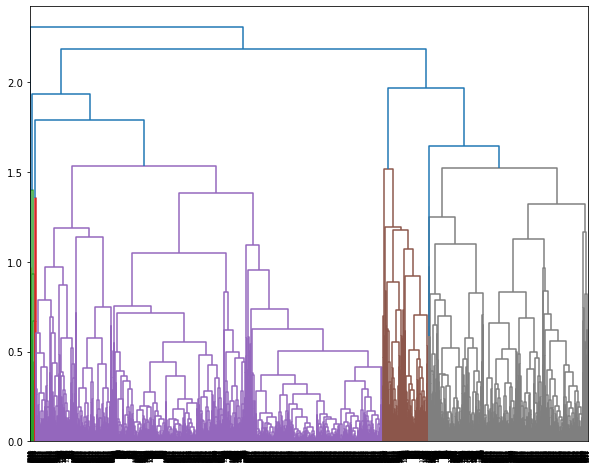

In [10]:
# create dendogram & we can use any one method (single,centroid ,complete) 
plt.figure(figsize=(10,8))
dendrogram=sch.dendrogram(sch.linkage(df_norm,method='complete'))


In [11]:
# create cluster
hc=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='ward')


In [12]:
# save clusters for chart
y_hc=hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
Clusters

,Clusters
0,0
1,0
2,0
3,0
4,3
...,...
3994,1
3995,1
3996,1
3997,0


In [13]:
df_norm['h_clusterid']=hc.labels_

In [14]:
data['h_clusterid']=hc.labels_

In [15]:
data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,h_clusterid
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [16]:
hc.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [17]:
df_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,h_clusterid
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0,0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0,0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0,0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0,0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0,1
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0,1
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0,1
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0,0


## DBSCAN

In [18]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [19]:
array=data.values
array

array([[28143,     0,     1, ...,  7000,     0,     0],
       [19244,     0,     1, ...,  6968,     0,     0],
       [41354,     0,     1, ...,  7034,     0,     0],
       ...,
       [73597,     0,     3, ...,  1402,     1,     1],
       [54899,     0,     1, ...,  1401,     0,     0],
       [ 3016,     0,     1, ...,  1398,     0,     0]], dtype=int64)

In [20]:
stscaler=StandardScaler().fit(array)
X=stscaler.transform(array)

In [21]:
X

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
         1.39545434e+00, -7.66919299e-01, -9.66222898e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
         1.37995704e+00, -7.66919299e-01, -9.66222898e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
         1.41192021e+00, -7.66919299e-01, -9.66222898e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -1.31560393e+00,  1.30391816e+00, -3.89549909e-02],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -1.31608822e+00, -7.66919299e-01, -9.66222898e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -1.31754109e+00, -7.66919299e-01, -9.66222898e-01]])

In [22]:
dbscan=DBSCAN(eps=0.8,min_samples=6)
dbscan.fit(X)

DBSCAN(eps=0.8, min_samples=6)

In [23]:
#Noisy samples are given the label -1.
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [24]:
c1=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [25]:
c1

,cluster
0,0
1,0
2,0
3,0
4,-1
...,...
3994,1
3995,1
3996,1
3997,0


In [26]:
# axis =1 means add on column bases.
data1=pd.concat([data,c1],axis=1)

In [27]:
data1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,h_clusterid,cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,1,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,0,0


## K - means

In [28]:
from sklearn.cluster import KMeans

In [29]:
# Normalization function 
scaler=StandardScaler()
scaled_data1=scaler.fit_transform(data.iloc[:,0:])
scaled_data1

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
         1.39545434e+00, -7.66919299e-01, -9.66222898e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
         1.37995704e+00, -7.66919299e-01, -9.66222898e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
         1.41192021e+00, -7.66919299e-01, -9.66222898e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -1.31560393e+00,  1.30391816e+00, -3.89549909e-02],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -1.31608822e+00, -7.66919299e-01, -9.66222898e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -1.31754109e+00, -7.66919299e-01, -9.66222898e-01]])

In [30]:
# How to find optimum number of  cluster
#The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

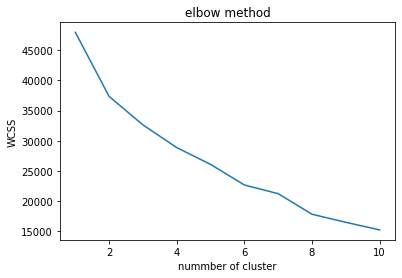

In [31]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(scaled_data1)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title('elbow method')
plt.xlabel('nummber of cluster')
plt.ylabel('WCSS')
plt.show()

In [32]:
#Build Cluster algorithm
clusters_new=KMeans(4,random_state=42)
clusters_new.fit(scaled_data1)

KMeans(n_clusters=4, random_state=42)

In [33]:
clusters_new.labels_

array([0, 0, 0, ..., 3, 0, 0])

In [34]:
#Assign clusters to the data set
data1['clusterid_new']=clusters_new.labels_

In [35]:
#these are standardized values.
clusters_new.cluster_centers_

array([[-0.32062628, -0.05890632, -0.72344062, -0.09824189, -0.06050698,
        -0.56829178, -0.5820865 , -0.16318949, -0.17921934, -0.22050047,
        -0.31383797, -0.67826674],
       [ 1.38196838,  0.98166061,  0.36487513, -0.09824189,  1.04623292,
         1.11082518,  1.68888334,  2.98559439,  3.27613095,  0.3555603 ,
         0.9516623 ,  0.69234393],
       [-0.04688966, -0.1562356 , -0.66822727,  9.03825361, -0.06276658,
        -0.10166533,  0.61785114,  0.0875494 ,  0.22034681, -0.07246398,
         0.05178388, -0.55649987],
       [ 0.30821015, -0.03356749,  1.06888821, -0.09824189, -0.04220797,
         0.72052776,  0.64573855, -0.14248787, -0.15970172,  0.2903089 ,
         0.35091738,  0.95467925]])

In [36]:
data1.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,h_clusterid,cluster
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,41428.874339,98.503086,1.063492,1.000000,1.000441,3425.548060,6.012346,231.482804,0.693563,3664.463404,0.219136,0.310847,0.166667
1,1,212852.695876,903.494845,2.561856,1.000000,1.216495,43968.994845,27.819588,4639.989691,13.798969,4852.747423,0.829897,1.788660,-1.000000
2,2,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349,0.441860,0.395349
3,3,104495.251673,118.226908,3.532798,1.000000,1.004016,34559.202811,17.810576,260.742303,0.768407,4716.880187,0.539491,2.072289,1.269076


In [37]:
data1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,h_clusterid,cluster,clusterid_new
0,28143,0,1,1,1,174,1,0,0,7000,0,0,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3,-1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,1,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1,1,3
3997,54899,0,1,1,1,500,1,500,1,1401,0,0,0,0


# Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler

In [39]:
crime=pd.read_csv('C:/Users/Osama Khan/OneDrive/Documents/Data Science/Assignment/Assignment 7/crime_data.csv')
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [40]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [41]:
crime1=crime.drop(['Unnamed: 0'],axis=1)

In [42]:
crime1.isna().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [43]:
crime1.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


##  Hierarchical clustering

In [44]:
#Normalization function
scaler=MinMaxScaler()
scaler_df=scaler.fit_transform(crime1.iloc[:,0:])
print(scaler_df)

[[0.74698795 0.65410959 0.44067797 0.35917313]
 [0.55421687 0.74657534 0.27118644 0.96124031]
 [0.43975904 0.85273973 0.81355932 0.6124031 ]
 [0.48192771 0.49657534 0.30508475 0.31524548]
 [0.4939759  0.79109589 1.         0.86046512]
 [0.42771084 0.54452055 0.77966102 0.81136951]
 [0.15060241 0.22260274 0.76271186 0.09819121]
 [0.30722892 0.6609589  0.6779661  0.21963824]
 [0.87951807 0.99315068 0.81355932 0.63565891]
 [1.         0.56849315 0.47457627 0.47803618]
 [0.27108434 0.00342466 0.86440678 0.33333333]
 [0.10843373 0.25684932 0.37288136 0.17829457]
 [0.57831325 0.69863014 0.86440678 0.43152455]
 [0.38554217 0.23287671 0.55932203 0.35400517]
 [0.08433735 0.03767123 0.42372881 0.10335917]
 [0.31325301 0.23972603 0.57627119 0.27648579]
 [0.53614458 0.21917808 0.33898305 0.23255814]
 [0.87951807 0.69863014 0.57627119 0.38501292]
 [0.07831325 0.13013699 0.3220339  0.0129199 ]
 [0.63253012 0.87328767 0.59322034 0.52971576]
 [0.21686747 0.35616438 0.89830508 0.23255814]
 [0.68072289 

In [45]:
# Another method for normalization
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [46]:
# Normalized data frame
df_norm=norm_func(crime1.iloc[:,0:])
df_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


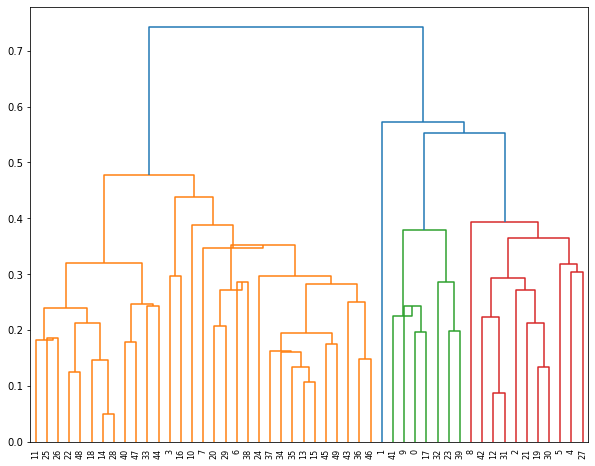

In [47]:
# create dendrogram
plt.figure(figsize=(10,8))
dendrogram=sch.dendrogram(sch.linkage(df_norm,method='centroid'))

In [48]:
# create clusters
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')

In [49]:
# save clusters for chart
y_hc=hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [50]:
df_norm['h_clusterid']=hc.labels_

In [51]:
crime1['h_clusterid']=hc.labels_
crime1

,Murder,Assault,UrbanPop,Rape,h_clusterid
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,0
2,8.1,294,80,31.0,0
3,8.8,190,50,19.5,1
4,9.0,276,91,40.6,0
5,7.9,204,78,38.7,0
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,1
8,15.4,335,80,31.9,0
9,17.4,211,60,25.8,0


## DBSCAN

In [52]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [53]:
array=crime1.values

In [54]:
array

array([[ 13.2, 236. ,  58. ,  21.2,   0. ],
       [ 10. , 263. ,  48. ,  44.5,   0. ],
       [  8.1, 294. ,  80. ,  31. ,   0. ],
       [  8.8, 190. ,  50. ,  19.5,   1. ],
       [  9. , 276. ,  91. ,  40.6,   0. ],
       [  7.9, 204. ,  78. ,  38.7,   0. ],
       [  3.3, 110. ,  77. ,  11.1,   1. ],
       [  5.9, 238. ,  72. ,  15.8,   1. ],
       [ 15.4, 335. ,  80. ,  31.9,   0. ],
       [ 17.4, 211. ,  60. ,  25.8,   0. ],
       [  5.3,  46. ,  83. ,  20.2,   1. ],
       [  2.6, 120. ,  54. ,  14.2,   2. ],
       [ 10.4, 249. ,  83. ,  24. ,   0. ],
       [  7.2, 113. ,  65. ,  21. ,   1. ],
       [  2.2,  56. ,  57. ,  11.3,   2. ],
       [  6. , 115. ,  66. ,  18. ,   1. ],
       [  9.7, 109. ,  52. ,  16.3,   1. ],
       [ 15.4, 249. ,  66. ,  22.2,   0. ],
       [  2.1,  83. ,  51. ,   7.8,   2. ],
       [ 11.3, 300. ,  67. ,  27.8,   0. ],
       [  4.4, 149. ,  85. ,  16.3,   1. ],
       [ 12.1, 255. ,  74. ,  35.1,   0. ],
       [  2.7,  72. ,  66. ,  14

In [55]:
strs=StandardScaler().fit(array)
X=strs.transform(array)

In [56]:
X

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116, -1.07165176],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392, -1.07165176],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626, -1.07165176],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398,  0.20412415],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393, -1.07165176],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137, -1.07165176],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319,  0.20412415],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422,  0.20412415],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 , -1.07165176],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293, -1.07165176],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987,  0.20412415],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217,  1.47990005],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525, -1.07165176],
       [-0.13637203, -0.70012057, -0.0

In [57]:
dbscan=DBSCAN(eps=0.8,min_samples=6)
dbscan.fit(X)

DBSCAN(eps=0.8, min_samples=6)

In [58]:
#Noisy samples are given the label -1.
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        0,  0, -1,  0, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1,  0],
      dtype=int64)

In [59]:
c1=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [60]:
c1

,cluster
0,-1
1,-1
2,-1
3,-1
4,-1
5,-1
6,-1
7,-1
8,-1
9,-1


In [61]:
crime2=pd.concat([crime1,c1],axis=1)

In [62]:
crime2

,Murder,Assault,UrbanPop,Rape,h_clusterid,cluster
0,13.2,236,58,21.2,0,-1
1,10.0,263,48,44.5,0,-1
2,8.1,294,80,31.0,0,-1
3,8.8,190,50,19.5,1,-1
4,9.0,276,91,40.6,0,-1
5,7.9,204,78,38.7,0,-1
6,3.3,110,77,11.1,1,-1
7,5.9,238,72,15.8,1,-1
8,15.4,335,80,31.9,0,-1
9,17.4,211,60,25.8,0,-1


## K - Means

In [63]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [64]:
# Normalization function
scaler=StandardScaler()
scaled_df=scaler.fit_transform(crime2.iloc[:,0:])

In [65]:
# How to find optimum number of  cluster
#The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

C:\Users\Osama Khan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


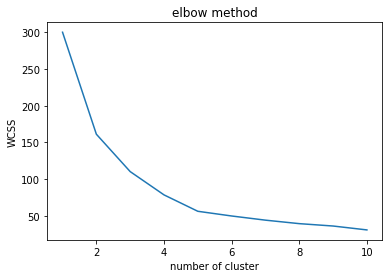

In [66]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title("elbow method")
plt.xlabel("number of cluster")
plt.ylabel("WCSS")
plt.show()

In [67]:
#Build Cluster algorithm
cluster_new=KMeans(4,random_state=42)
cluster_new.fit(scaled_df)

KMeans(n_clusters=4, random_state=42)

In [68]:
cluster_new.labels_

array([0, 0, 0, 1, 0, 0, 3, 3, 0, 0, 3, 1, 0, 2, 1, 2, 1, 0, 1, 0, 3, 0,
       1, 0, 0, 1, 1, 0, 1, 3, 0, 0, 0, 1, 2, 2, 3, 2, 3, 0, 1, 0, 0, 3,
       1, 2, 3, 1, 1, 2])

In [69]:
#Assign clusters to the data set
crime2['clusterid_new']=cluster_new.labels_

In [70]:
#these are standardized values.
cluster_new.cluster_centers_

array([[ 1.01513667,  1.02412028,  0.19959126,  0.85556386, -1.07165176,
        -0.40347329],
       [-0.88515915, -1.0213324 , -0.94990286, -0.92016524,  1.29764635,
        -0.40347329],
       [-0.19269672, -0.47328095,  0.10188925, -0.26228808,  0.20412415,
         2.4784788 ],
       [-0.7290698 , -0.31897614,  0.95484335, -0.26588303,  0.20412415,
        -0.40347329]])

In [71]:
crime2.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,Murder,Assault,UrbanPop,Rape,h_clusterid,cluster
,,mean,mean,mean,mean,mean,mean
0,0,12.165000,255.250000,68.400000,29.165000,0.000000,-1
1,1,3.971429,86.500000,51.928571,12.700000,1.857143,-1
2,2,6.957143,131.714286,67.000000,18.800000,1.000000,0
3,3,4.644444,144.444444,79.222222,18.766667,1.000000,-1


In [72]:
crime2

,Murder,Assault,UrbanPop,Rape,h_clusterid,cluster,clusterid_new
0,13.2,236,58,21.2,0,-1,0
1,10.0,263,48,44.5,0,-1,0
2,8.1,294,80,31.0,0,-1,0
3,8.8,190,50,19.5,1,-1,1
4,9.0,276,91,40.6,0,-1,0
5,7.9,204,78,38.7,0,-1,0
6,3.3,110,77,11.1,1,-1,3
7,5.9,238,72,15.8,1,-1,3
8,15.4,335,80,31.9,0,-1,0
9,17.4,211,60,25.8,0,-1,0
